# 搭建最小的神經網路

Keras官方文檔：https://keras.io/api/

---

# 匯入函式庫

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

模型過小改用純CPU跑比較快

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# 建立訓練資料

建立資料

In [3]:
train_num = 800
x_train = np.random.rand(train_num) * 2 - 1
y_train = x_train * -1
val_num = 200
x_val = np.random.rand(val_num) * 2 - 1
y_val = x_val * -1

圖表顯示資料

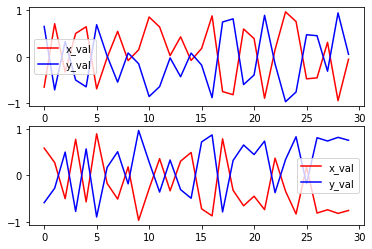

In [4]:
plt.subplot(211)
plt.plot(x_train[:30], color='r', label='x_val')
plt.plot(y_train[:30], color='b', label='y_val')
plt.legend()
plt.subplot(212)
plt.plot(x_val[:30], color='r', label='x_val')
plt.plot(y_val[:30], color='b', label='y_val')
plt.legend()
plt.show()

# 建立神經網路模型

Keras官方文檔 - layers API：https://keras.io/api/layers/

In [5]:
model = tf.keras.models.Sequential([
  layers.Input(shape=(1,)),
  layers.Dense(1, activation="linear", use_bias=False, kernel_initializer="RandomUniform")
  # layers.Dense(1, activation="relu", use_bias=False, kernel_initializer="he_uniform")
  # layers.Dense(1, activation="tanh", use_bias=False, kernel_initializer="glorot_uniform")
])
model.compile(optimizer="adam", loss="mse")

查看模型結構

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


查看模型圖形化結構

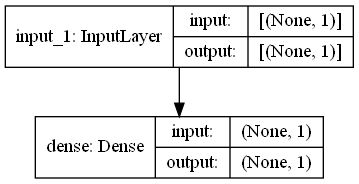

In [7]:
plot_model(model, show_shapes=True)

查看訓練前的權重

In [8]:
model.get_weights()

[array([[0.01088227]], dtype=float32)]

# 訓練參數設定

Keras官方文檔 - ModelCheckpoint：https://keras.io/api/callbacks/model_checkpoint/

In [9]:
callbacks = []

''' EarlyStopping '''
callbacks.append(
  keras.callbacks.EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
)

''' Param '''
batch_size = 32
epochs = 10000

# 開始訓練

In [10]:
trainHistory = model.fit(
  x_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  validation_data=(x_val, y_val),
  callbacks=callbacks
)

Epoch 1/10000
25/25 [==============================] - 0s 7ms/step - loss: 0.3170 - val_loss: 0.3129
Epoch 2/10000
25/25 [==============================] - 0s 2ms/step - loss: 0.3014 - val_loss: 0.2977
Epoch 3/10000
25/25 [==============================] - 0s 2ms/step - loss: 0.2866 - val_loss: 0.2827
Epoch 4/10000
25/25 [==============================] - 0s 2ms/step - loss: 0.2722 - val_loss: 0.2686
Epoch 5/10000
25/25 [==============================] - 0s 2ms/step - loss: 0.2586 - val_loss: 0.2547
Epoch 6/10000
25/25 [==============================] - 0s 2ms/step - loss: 0.2452 - val_loss: 0.2417
Epoch 7/10000
25/25 [==============================] - 0s 2ms/step - loss: 0.2325 - val_loss: 0.2292
Epoch 8/10000
25/25 [==============================] - 0s 2ms/step - loss: 0.2203 - val_loss: 0.2170
Epoch 9/10000
25/25 [==============================] - 0s 2ms/step - loss: 0.2086 - val_loss: 0.2055
Epoch 10/10000
25/25 [==============================] - 0s 2ms/step - loss: 0.1974 - val_lo

# 訓練結果

查看訓練後的權重變化

In [11]:
model.get_weights()

[array([[-0.9999994]], dtype=float32)]

圖表顯示訓練時Loss曲線變化

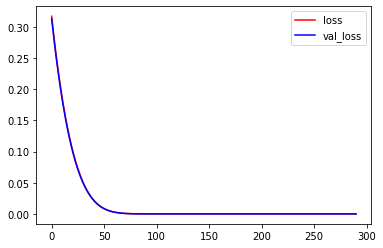

In [12]:
plt.plot(trainHistory.history['loss'], color='r', label='loss')
plt.plot(trainHistory.history['val_loss'], color='b', label='val_loss')
plt.legend()
plt.show()

建立測試資料

In [13]:
num = 1000
x_test = np.random.rand(num) * 2 - 1
y_test = x_test * -1

使用模型進行評估

In [14]:
model.evaluate(x_test)

32/32 [==============================] - 0s 887us/step - loss: 0.0000e+00


0.0

使用模型進行預測

In [15]:
predicted = model.predict(x_test)

圖表顯示預測結果

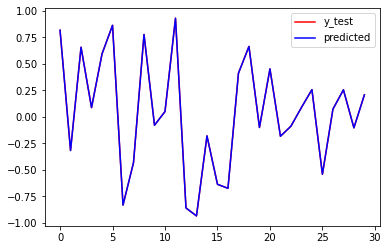

In [16]:
plt.plot(y_test[:30], color='r', label='y_test')
plt.plot(predicted[:30], color='b', label='predicted')
plt.legend()
plt.show()

列表顯示預測結果

In [17]:
for i in range(10):
  print(f'{i}. y_test = {y_test[i]:13.10f},  predicted = {predicted[i, 0]:13.10f},  ads_diff = {abs(predicted[i, 0] - y_test[i]):12.10f}')

0. y_test =  0.8180613834,  predicted =  0.8180609345,  ads_diff = 0.0000004489
1. y_test = -0.3167740466,  predicted = -0.3167738616,  ads_diff = 0.0000001849
2. y_test =  0.6579211329,  predicted =  0.6579207182,  ads_diff = 0.0000004147
3. y_test =  0.0878641849,  predicted =  0.0878641307,  ads_diff = 0.0000000542
4. y_test =  0.5947335167,  predicted =  0.5947331786,  ads_diff = 0.0000003380
5. y_test =  0.8644054812,  predicted =  0.8644049168,  ads_diff = 0.0000005644
6. y_test = -0.8321867728,  predicted = -0.8321862817,  ads_diff = 0.0000004912
7. y_test = -0.4315222310,  predicted = -0.4315219522,  ads_diff = 0.0000002788
8. y_test =  0.7780025339,  predicted =  0.7780020833,  ads_diff = 0.0000004506
9. y_test = -0.0784133343,  predicted = -0.0784132928,  ads_diff = 0.0000000415
